In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression

In [2]:
data = pd.read_csv("INR.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-11,77.271400,77.518501,77.154503,77.271400,77.271400,0
1,2022-05-12,77.418404,77.725998,77.278999,77.418404,77.418404,0
2,2022-05-13,77.443802,77.558502,77.256798,77.443802,77.443802,0
3,2022-05-16,77.486298,77.913498,77.480003,77.486298,77.486298,0
4,2022-05-17,77.805397,78.023804,77.369003,77.805397,77.805397,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       263 non-null    object 
 1   Open       263 non-null    float64
 2   High       263 non-null    float64
 3   Low        263 non-null    float64
 4   Close      263 non-null    float64
 5   Adj Close  263 non-null    float64
 6   Volume     263 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [4]:
# droping the 'Volume' column
data = data.drop(columns=['Volume'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       263 non-null    object 
 1   Open       263 non-null    float64
 2   High       263 non-null    float64
 3   Low        263 non-null    float64
 4   Close      263 non-null    float64
 5   Adj Close  263 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.5+ KB


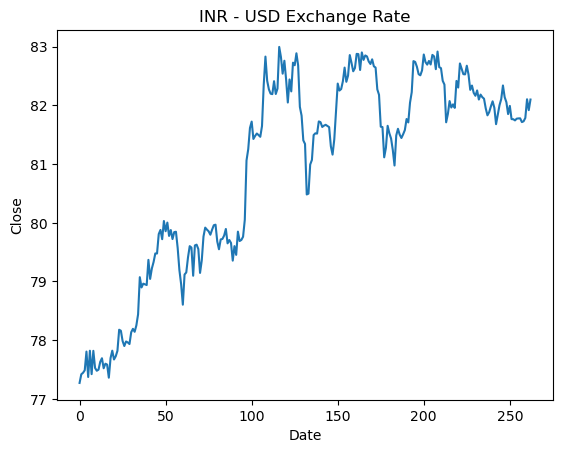

In [6]:
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open     High       Low     Close  Adj Close
Open       1.000000  0.99479  0.995246  1.000000   1.000000
High       0.994790  1.00000  0.992020  0.994790   0.994790
Low        0.995246  0.99202  1.000000  0.995246   0.995246
Close      1.000000  0.99479  0.995246  1.000000   1.000000
Adj Close  1.000000  0.99479  0.995246  1.000000   1.000000


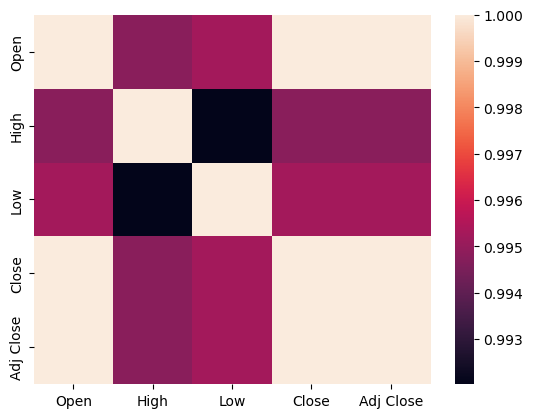

In [7]:
corr_data = data.loc[ : , data.columns != 'Date'].corr()
# corr_data = data.loc[ : , ~data.columns.isin(['Date', 'Volume'])].corr()
print(corr_data)
sns.heatmap(corr_data)
plt.show()

In [8]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [11]:
# Evaluating the Model Performance

from sklearn.metrics import r2_score
r2_score(ytest, ypred)

0.9995425407209209

In [12]:
df = pd.DataFrame(data={"Predicted Rate": ypred})
print(df.head())

   Predicted Rate
0       82.265297
1       82.417397
2       81.779999
3       82.529099
4       79.118301



**Getting the dates next to the predicted value**

In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [14]:
from datetime import datetime, timedelta

last_date = data['Date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 6)]
future_df = pd.DataFrame({'Date': future_dates})

In [15]:
future_df

,Date
0,2023-05-13
1,2023-05-14
2,2023-05-15
3,2023-05-16
4,2023-05-17


In [16]:
df = pd.concat([future_df, df],axis = 1)

In [17]:
df.head()

,Date,Predicted Rate
0,2023-05-13,82.265297
1,2023-05-14,82.417397
2,2023-05-15,81.779999
3,2023-05-16,82.529099
4,2023-05-17,79.118301
